In [1]:
import json

# Load the data from the JSON file
with open('tokenizedFine_300.json', 'r') as file:
    fixed_sampled_stories = json.load(file)

In [2]:
# Explore the Data
print("Total number of stories:", len(fixed_sampled_stories))
print("Sample story:", fixed_sampled_stories[0])

Total number of stories: 300
Sample story: amazon thursday announced launch new product multichannel fulfilment enable seller run online business accessing fulfilment infrastructure even platform excited announce product called multichannel fulfilment allows small business brand take advantage fulfilment infrastructure worry inventory fulfilment look irrespective whether selling amazon amazon matter digital seller run operation using amazon fulfilment infrastructure amit agarwal senior vice president emerging market amazon speaking amazon smbhav summit national capital leveraging generative artificial intelligence genai business rolling sahai virtual assistant help small business navigate online operation spirit future technology excited announce generative ai solution small business generative ai solution launching india small business called sahai play agarwal tagline seller life easy sahai help seller amazon clarify query list product generate product attribute analyse trend sale ro

In [3]:
import json
import pandas as pd

# Load the preprocessed sample stories
with open ('tokenizedFine_300.json', 'r') as file:
    preproccessed_stories = json.load(file)
    
# Convert to DataFrame for convenience
df = pd.DataFrame(preproccessed_stories)

print(df.head())

                                                   0
0  amazon thursday announced launch new product m...
1  new york time filed civil lawsuit openai micro...
2  valuation tripled le month openai completed de...
3  bengaluru cognizant bagged active early client...
4  editor keep plastic ocean start river boyan sl...


##### Extract Entities from Text

In [4]:
import json
import pandas as pd
import spacy

# Load the spaCy NER model
nlp = spacy.load('en_core_web_sm')

# Function to extract entities from text using spaCy
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Load the tokenized data
input_file_path = 'tokenizedFine_300.json'  # Replace with your actual file path
with open(input_file_path, 'r') as file:
    tokenized_data = json.load(file)

# Convert the tokenized data to a DataFrame
df = pd.DataFrame(tokenized_data, columns=['text'])

# Apply entity extraction to each row and populate a new column with extracted entities
df['entities'] = df['text'].apply(extract_entities)

# Print the first 10 rows of the DataFrame
print(df.head(10))


                                                text  \
0  amazon thursday announced launch new product m...   
1  new york time filed civil lawsuit openai micro...   
2  valuation tripled le month openai completed de...   
3  bengaluru cognizant bagged active early client...   
4  editor keep plastic ocean start river boyan sl...   
5  amazon google meta among company announced gui...   
6  technology company leery artificial intelligen...   
7  november ilya sutskever joined three openai bo...   
8  abstract professor around world experimenting ...   
9  company leveraging healthcare data hospital en...   

                                            entities  
0  [(amazon, ORG), (thursday, DATE), (amazon smbh...  
1  [(new york, GPE), (microsoft, ORG), (manhattan...  
2  [(san francisco, GPE), (billion, CARDINAL), (t...  
3  [(bengaluru, ORG), (kumar, PERSON), (last week...  
4  [(next three decade, DATE), (california canada...  
5  [(amazon, ORG), (google meta, PRODUCT), (seven... 

In [5]:
# Apply entity extraction to each row and populate a new column with extracted entities
df['entities'] = df['text'].apply(extract_entities)

# Check the extracted entities
print("Sample of 'entities' column:")
print(df['entities'].head())

# Verify that entities are extracted correctly
for i, row in df.iterrows():
    print(f"Story {i}:")
    print(row['entities'])
    print()

Sample of 'entities' column:
0    [(amazon, ORG), (thursday, DATE), (amazon smbh...
1    [(new york, GPE), (microsoft, ORG), (manhattan...
2    [(san francisco, GPE), (billion, CARDINAL), (t...
3    [(bengaluru, ORG), (kumar, PERSON), (last week...
4    [(next three decade, DATE), (california canada...
Name: entities, dtype: object
Story 0:
[('amazon', 'ORG'), ('thursday', 'DATE'), ('amazon smbhav summit national capital', 'ORG'), ('india', 'GPE'), ('forward russell', 'PERSON'), ('india', 'GPE'), ('indian', 'NORP'), ('new york', 'GPE'), ('billion', 'CARDINAL'), ('india', 'GPE'), ('indian', 'NORP'), ('billion', 'CARDINAL'), ('indian', 'NORP'), ('india', 'GPE'), ('next ten year', 'DATE'), ('india', 'GPE'), ('august', 'DATE')]

Story 1:
[('new york', 'GPE'), ('microsoft', 'ORG'), ('manhattan', 'GPE'), ('wednesday', 'DATE'), ('billion dollar', 'MONEY'), ('today', 'DATE'), ('microsoft', 'ORG'), ('recent year', 'DATE'), ('wednesday', 'DATE'), ('sam altman', 'PERSON'), ('november', 'DATE'), (

In [6]:
# Filter entities based on selected types
selected_entity_types = ['ORG', 'PERSON', 'GPE']

def filter_entities(entities, selected_types):
    # Ensure entities is a list of tuples
    if not isinstance(entities, list):
        return []
    return [entity[0] for entity in entities if isinstance(entity, tuple) and len(entity) == 2 and entity[1] in selected_types]

# Apply filtering to extract selected entities
df['selected_entities'] = df['entities'].apply(lambda x: filter_entities(x, selected_entity_types))

# Check the filtered entities
print("Sample of 'selected_entities' column:")
print(df['selected_entities'].head())

# Verify that filtering works correctly
for i, row in df.iterrows():
    print(f"Story {i} selected entities:")
    print(row['selected_entities'])
    print()

Sample of 'selected_entities' column:
0    [amazon, amazon smbhav summit national capital...
1    [new york, microsoft, manhattan, microsoft, sa...
2    [san francisco, new york, sam altman, wilmerha...
3                                   [bengaluru, kumar]
4    [california canada chile, france, european uni...
Name: selected_entities, dtype: object
Story 0 selected entities:
['amazon', 'amazon smbhav summit national capital', 'india', 'forward russell', 'india', 'new york', 'india', 'india', 'india']

Story 1 selected entities:
['new york', 'microsoft', 'manhattan', 'microsoft', 'sam altman', 'sarah siverman', 'jonathan franzen george martin', 'new york', 'new york']

Story 2 selected entities:
['san francisco', 'new york', 'sam altman', 'wilmerhale', 'andreessen horowitz', 'microsoft', 'google researcher', 'google', 'sam altman', 'new york']

Story 3 selected entities:
['bengaluru', 'kumar']

Story 4 selected entities:
['california canada chile', 'france', 'european union', 'oceana',

Sample of flattened selected entities list:
['amazon', 'amazon smbhav summit national capital', 'india', 'forward russell', 'india', 'new york', 'india', 'india', 'india', 'new york', 'microsoft', 'manhattan', 'microsoft', 'sam altman', 'sarah siverman', 'jonathan franzen george martin', 'new york', 'new york', 'san francisco', 'new york']
Entity frequencies:
microsoft        401
india            274
new york         218
google           164
china             98
washington        57
san francisco     53
united state      53
sam altman        46
california        43
congress          40
intel             38
white house       32
america           32
fed               31
taiwan            29
japan             27
russia            27
khan              25
chang             25
Name: count, dtype: int64


/var/folders/15/flznp7b90sd75nfgk99v3l3w0000gn/T/ipykernel_21412/4165666088.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_freq.values[:20], y=entity_freq.index[:20], palette='viridis')


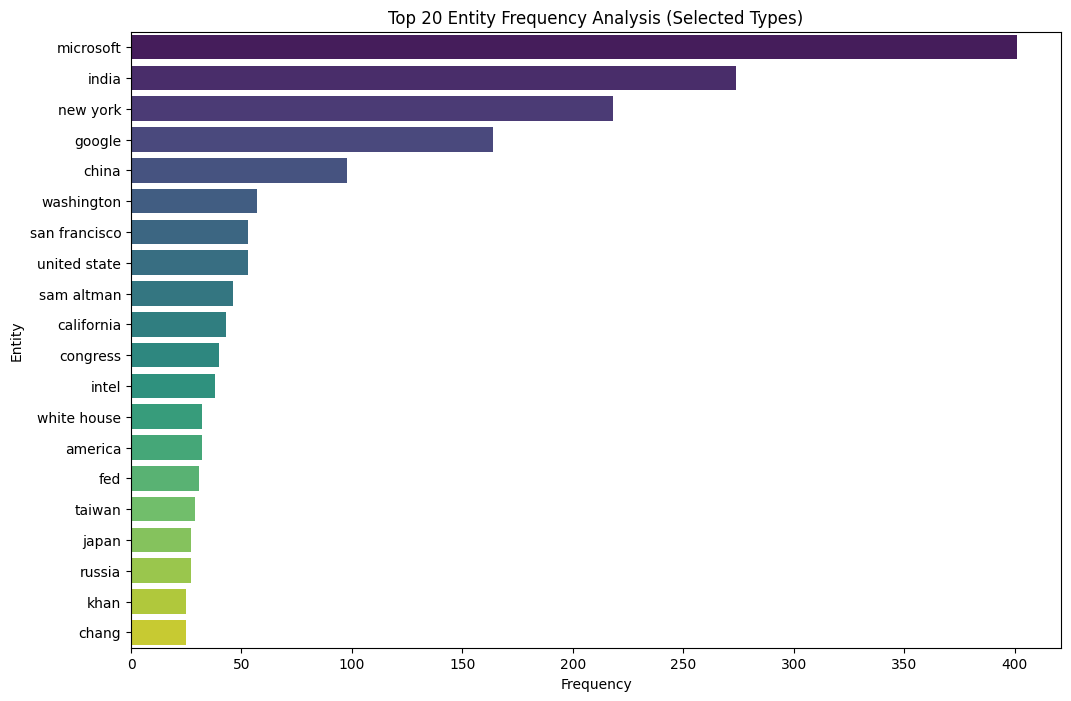

In [7]:
# Flatten the list of selected entities to calculate frequencies
all_selected_entities = [entity for sublist in df['selected_entities'] for entity in sublist]

# Check the flattened list of selected entities
print("Sample of flattened selected entities list:")
print(all_selected_entities[:20])

# Calculate frequency of selected entities
entity_freq = pd.Series(all_selected_entities).value_counts()

# Check the frequency of selected entities
print("Entity frequencies:")
print(entity_freq.head(20))

# Plot a bar chart of the top 20 entities
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=entity_freq.values[:20], y=entity_freq.index[:20], palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Entity')
plt.title('Top 20 Entity Frequency Analysis (Selected Types)')
plt.show()